## 4. Barrier Options

In [1]:
# import all stuff we will need
import numpy as np
import matplotlib.pyplot as plt

from call_put_bs import call_put_bs
from barrier_bs import barrier_bs
from gbm_d import gbm_d
from yf import yf

Do an example. Simulate two paths of a geometric Brownian motion 

$$S_t=S_0e^{(\mu-\sigma^2/2)t+\sigma W_t}$$

for $S_0=100$, $\mu=0$, $\sigma=0.3$ and $t\in [0,2]$ and check wether the paths hit the barrier $B=80$.

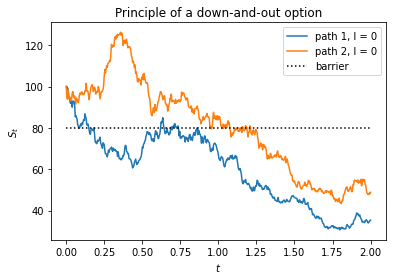

In [2]:
s0 = 100; mu = 0; sigma = 0.3; T = 2; B = 80; dt = 1/252;
S1,t = gbm_d([s0],[mu],[[sigma**2]],[],T,dt)
S2,t = gbm_d([s0],[mu],[[sigma**2]],[],T,dt)

plt.plot(t,S1); plt.plot(t,S2); plt.plot([0,T],[B,B],'k:');
plt.xlabel('$t$'); plt.ylabel('$S_t$');
plt.title('Principle of a down-and-out option')
plt.legend(('path 1, I = %i' %int(np.min(S1)>=B),'path 2, I = %i' %int(np.min(S2)>=B),'barrier'));

## 4.1. Pricing single barrier options

### Example 1.

On September $26$, $2018$, we consider a down-and-out put on Nestle. The underlying has the following values: $s=S_0=80.80$ CHF, $\sigma=14.74\%$ and $q=3.30\%$ ($\sigma$ and $q$ are from Bloomberg). The parameters of the down-and-out put are: strike $X=84.84$ CHF, barrier $B=55.752$, maturity September $27$, $2021$. The continuously compounded risk free is $r=-0.329\%$.

The Python function <span style="color:orange">barrier_bs.py</span> gives the value of down-and-out and down-and-in call or put options.

In [3]:
T = yf((26,9,2018),[(27,9,2021)])
V = barrier_bs(80.80,55.752,84.84,T[0],0.1474,-0.00329,0.033)
T[0], V[0]

(3.0027777777777778, 6.4554971129640695)

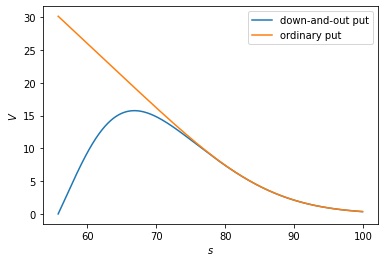

In [4]:
s = np.arange(55.752,100,0.1)
plt.plot(s,barrier_bs(s,55.752,84.84,0.5,0.1474,-0.00329,0.033)[0]);
plt.plot(s,call_put_bs(s=s,X=84.84,T=0.5,sigma=0.1474,q=0.033,r=-0.00329,omega=-1));
plt.xlabel('$s$'); plt.ylabel('$V$'); plt.legend(('down-and-out put','ordinary put'));

## 4.2 Exit probability

In [5]:
import scipy.stats as ss
def exit_prob(s,B,t,mu,sigma):
    a = 2*mu/sigma**2-1
    dp = (np.log(B/s)+(mu-sigma**2/2)*t)/(sigma*np.sqrt(t))
    dm = (np.log(B/s)-(mu-sigma**2/2)*t)/(sigma*np.sqrt(t))
    p = (B/s)**a*ss.norm.cdf(dp)+ss.norm.cdf(dm)
    
    return p

### Example 2.
On September $26$, $2018$, we calculate the probability that Nestle from example 4.2 hits the barrier in the next $3$ years. To do so, we may estimate $\mu$ and $\sigma$ using historical data. A time series of daily closing prices of Nestle ranging from September $25$, $2015$ to September $25$, $2018$, yields $\mu=5.3\%$ and $\sigma=14.8\%$

In [6]:
exit_prob(80.8,55.752,3,0.053,0.148)

0.06703777530984827

Do a plot of of the graph $\frac{s}{B}\mapsto p(s,t)$ for $\mu=0$, $\sigma\in \{0.1,0.2,0.3\}$ and $t=0.5$. 

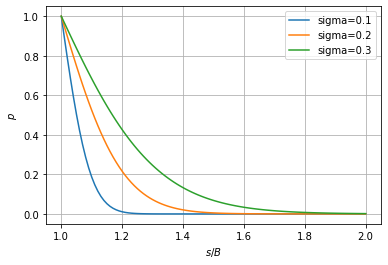

In [7]:
B = 1; s = np.arange(B,2*B+0.01,0.01);
plt.plot(s,exit_prob(s,B,0.5,0,0.1)); plt.plot(s,exit_prob(s,B,0.5,0,0.2)); plt.plot(s,exit_prob(s,B,0.5,0,0.3));
plt.xlabel('$s/B$'); plt.ylabel('$p$'); plt.legend(('sigma=0.1','sigma=0.2','sigma=0.3'))
plt.grid(b=True)